# Testing some assumptions

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('../Data/restaurant_1_2018-12-09.csv')
data = data.iloc[:, 1:]
data.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m),distance,distance (m)
0,1,2018-12-09 07:30:00,2018-12-09 06:30:03,31.181756,121.536031,3597,59.0,0.327588,327.587678
1,1,2018-12-09 07:30:00,2018-12-09 06:30:07,31.189533,121.517909,3593,59.0,2.038446,2038.445562
2,1,2018-12-09 07:30:00,2018-12-09 06:30:09,31.201872,121.537751,3591,59.0,1.984581,1984.580871
3,1,2018-12-09 07:30:00,2018-12-09 06:30:14,31.185356,121.520827,3586,59.0,1.672082,1672.082205
4,1,2018-12-09 07:30:00,2018-12-09 06:30:16,31.188349,121.542251,3584,59.0,0.613970,613.970415


In [4]:
data['promised delivery time'] = pd.to_datetime(data['promised delivery time'])
data['ordering time'] = pd.to_datetime(data['ordering time'])

data['ordering hour'] = data['ordering time'].dt.hour
data.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m),distance,distance (m),ordering hour
0,1,2018-12-09 07:30:00,2018-12-09 06:30:03,31.181756,121.536031,3597,59.0,0.327588,327.587678,6
1,1,2018-12-09 07:30:00,2018-12-09 06:30:07,31.189533,121.517909,3593,59.0,2.038446,2038.445562,6
2,1,2018-12-09 07:30:00,2018-12-09 06:30:09,31.201872,121.537751,3591,59.0,1.984581,1984.580871,6
3,1,2018-12-09 07:30:00,2018-12-09 06:30:14,31.185356,121.520827,3586,59.0,1.672082,1672.082205,6
4,1,2018-12-09 07:30:00,2018-12-09 06:30:16,31.188349,121.542251,3584,59.0,0.613970,613.970415,6


In [8]:
hours = data['ordering hour'].unique()
data_hour = {i:[] for i in hours}

for h in hours:
    df = data.loc[data['ordering hour'] == h]
    data_hour[h].append(df)

data_hour[6][0].info

<bound method DataFrame.info of     store_id promised delivery time       ordering time   latitude  \
0          1    2018-12-09 07:30:00 2018-12-09 06:30:03  31.181756   
1          1    2018-12-09 07:30:00 2018-12-09 06:30:07  31.189533   
2          1    2018-12-09 07:30:00 2018-12-09 06:30:09  31.201872   
3          1    2018-12-09 07:30:00 2018-12-09 06:30:14  31.185356   
4          1    2018-12-09 07:30:00 2018-12-09 06:30:16  31.188349   
5          1    2018-12-09 07:30:00 2018-12-09 06:30:18  31.191440   
6          1    2018-12-09 07:30:00 2018-12-09 06:30:22  31.196642   
7          1    2018-12-09 07:30:00 2018-12-09 06:30:26  31.191613   
8          1    2018-12-09 07:30:00 2018-12-09 06:30:28  31.189531   
9          1    2018-12-09 07:30:00 2018-12-09 06:30:30  31.192338   
10         1    2018-12-09 07:30:00 2018-12-09 06:30:42  31.188228   
11         1    2018-12-09 08:00:00 2018-12-09 06:46:57  31.189481   
12         1    2018-12-09 08:00:00 2018-12-09 06:47:06  3

In [9]:
data_hour_6 = data_hour[6][0]
data_hour_6.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m),distance,distance (m),ordering hour
0,1,2018-12-09 07:30:00,2018-12-09 06:30:03,31.181756,121.536031,3597,59.0,0.327588,327.587678,6
1,1,2018-12-09 07:30:00,2018-12-09 06:30:07,31.189533,121.517909,3593,59.0,2.038446,2038.445562,6
2,1,2018-12-09 07:30:00,2018-12-09 06:30:09,31.201872,121.537751,3591,59.0,1.984581,1984.580871,6
3,1,2018-12-09 07:30:00,2018-12-09 06:30:14,31.185356,121.520827,3586,59.0,1.672082,1672.082205,6
4,1,2018-12-09 07:30:00,2018-12-09 06:30:16,31.188349,121.542251,3584,59.0,0.613970,613.970415,6


In [11]:
data_hour_6['delivery time (m)'].unique()

array([ 59.,  73.,  72., 101.])

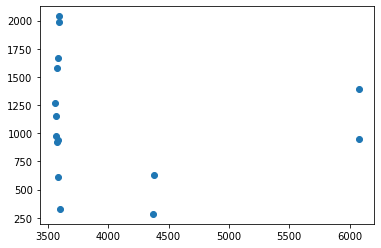

In [14]:
plt.scatter(data_hour_6['delivery time (s)'], data_hour_6['distance (m)'])

In [15]:
# correlation
corr = data_hour_6['delivery time (s)'].corr(data_hour_6['distance (m)'])
corr

-0.11620451479528483

In [17]:
data_hour_6[['delivery time (s)', 'distance (m)']]

,delivery time (s),distance (m)
0,3597,327.587678
1,3593,2038.445562
2,3591,1984.580871
3,3586,1672.082205
4,3584,613.970415
5,3582,940.945912
6,3578,1582.983442
7,3574,919.221577
8,3572,1155.390088
9,3570,979.327891


## Test the average promise delivery time by hours

In [20]:
data_res_1 = pd.read_csv('../Data/restaurant_1.csv')
data_res_1 = data_res_1.iloc[:, 1:]
data_res_1.head()

,store_id,promised delivery time,ordering time,latitude,longitude,delivery time (s),delivery time (m),distance,distance (m)
0,1,2019-01-01 07:30:00,2019-01-01 06:30:07,31.167880,121.536578,3593,59.0,1.792374,1792.374399
1,1,2019-01-01 07:30:00,2019-01-01 06:35:02,31.175481,121.537246,3298,54.0,0.947436,947.436336
2,1,2019-01-01 08:00:00,2019-01-01 06:47:55,31.179777,121.553969,4325,72.0,1.564975,1564.975000
3,1,2019-01-01 08:00:00,2019-01-01 06:48:59,31.175272,121.540357,4261,71.0,0.985111,985.111196
4,1,2019-01-01 07:45:00,2019-01-01 06:50:00,31.175667,121.548509,3300,55.0,1.340554,1340.554487


In [44]:
import datetime

# transfer to datetime
data_res_1['promised delivery time'] = pd.to_datetime(data_res_1['promised delivery time'])
data_res_1['ordering time'] = pd.to_datetime(data_res_1['ordering time'])
dates = [i for i in data_res_1['ordering time'].dt.date.unique()]

# add new column 'hour' represent the order hour
data_res_1['ordering hour'] = data_res_1['ordering time'].dt.hour
data_res_1['ordering date'] = data_res_1['ordering time'].dt.date 

# number of orders for each hour
hours_1 = data_res_1['ordering hour'].unique()
orders_per_day_hour = {(i.strftime('%Y-%m-%d'), j):0 for i in dates for j in hours_1}

for d in dates:
    for h in hours_1:
        df = data_res_1.loc[(data_res_1['ordering hour'] == h) & (data_res_1['ordering date'] == d)]
        orders_per_day_hour[(d.strftime('%Y-%m-%d'), h)] = df.shape[0]

orders_per_day_hour


{('2019-01-01', 6): 6,
 ('2019-01-01', 7): 19,
 ('2019-01-01', 8): 47,
 ('2019-01-01', 9): 82,
 ('2019-01-01', 10): 121,
 ('2019-01-01', 11): 90,
 ('2019-01-01', 12): 66,
 ('2019-01-01', 13): 56,
 ('2019-01-01', 14): 51,
 ('2019-01-01', 15): 62,
 ('2019-01-01', 16): 85,
 ('2019-01-01', 17): 96,
 ('2019-01-01', 18): 58,
 ('2019-01-01', 19): 38,
 ('2019-01-01', 20): 42,
 ('2019-01-01', 21): 19,
 ('2019-01-02', 6): 12,
 ('2019-01-02', 7): 18,
 ('2019-01-02', 8): 31,
 ('2019-01-02', 9): 54,
 ('2019-01-02', 10): 47,
 ('2019-01-02', 11): 44,
 ('2019-01-02', 12): 48,
 ('2019-01-02', 13): 49,
 ('2019-01-02', 14): 44,
 ('2019-01-02', 15): 47,
 ('2019-01-02', 16): 63,
 ('2019-01-02', 17): 79,
 ('2019-01-02', 18): 65,
 ('2019-01-02', 19): 57,
 ('2019-01-02', 20): 43,
 ('2019-01-02', 21): 27,
 ('2019-01-03', 6): 15,
 ('2019-01-03', 7): 10,
 ('2019-01-03', 8): 34,
 ('2019-01-03', 9): 47,
 ('2019-01-03', 10): 58,
 ('2019-01-03', 11): 51,
 ('2019-01-03', 12): 58,
 ('2019-01-03', 13): 45,
 ('2019-01-0

In [58]:
out_df = pd.Series(orders_per_day_hour).reset_index()
out_df.columns = ['Date', 'Hour', 'Num of Orders']
out_df

,Date,Hour,Num of Orders
0,2019-01-01,6,6
1,2019-01-01,7,19
2,2019-01-01,8,47
3,2019-01-01,9,82
4,2019-01-01,10,121
...,...,...,...
219,2018-12-31,17,71
220,2018-12-31,18,88
221,2018-12-31,19,57
222,2018-12-31,20,43


In [59]:
out_df.to_csv('../Data/restaurant_1_orders_per_day_hour.csv')

In [65]:
hour_order_dict = {k:0 for k in range(6, 22)}

for h in range(6, 22):
    print(h, out_df.loc[out_df['Hour'] == h]['Num of Orders'].mean())
    hour_order_dict[h] = int(out_df.loc[out_df['Hour'] == h]['Num of Orders'].mean())

hour_order_dict

6 12.428571428571429
7 23.071428571428573
8 41.714285714285715
9 60.92857142857143
10 80.07142857142857
11 66.92857142857143
12 51.57142857142857
13 44.285714285714285
14 44.642857142857146
15 60.642857142857146
16 83.07142857142857
17 82.57142857142857
18 71.28571428571429
19 54.5
20 43.214285714285715
21 15.571428571428571


{6: 12,
 7: 23,
 8: 41,
 9: 60,
 10: 80,
 11: 66,
 12: 51,
 13: 44,
 14: 44,
 15: 60,
 16: 83,
 17: 82,
 18: 71,
 19: 54,
 20: 43,
 21: 15}

<BarContainer object of 16 artists>

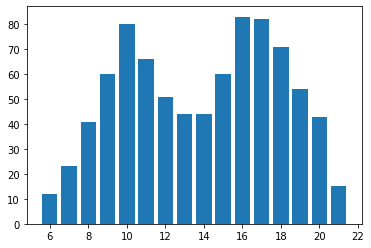

In [67]:
plt.bar(range(6, 22), list(hour_order_dict.values()))

In [69]:
hour_delivery_time_dict = {i:0 for i in range(6, 22)}

for h in range(6, 22):
    print(h, data_res_1.loc[data_res_1['ordering hour'] == h]['delivery time (m)'].mean())
    hour_delivery_time_dict[h] = int(data_res_1.loc[data_res_1['ordering hour'] == h]['delivery time (m)'].mean())

hour_delivery_time_dict

6 63.54597701149425
7 62.78947368421053
8 58.57876712328767
9 56.08323563892145
10 55.994647636039254
11 55.14407684098186
12 61.31163434903047
13 59.34516129032258
14 63.0576
15 61.96348645465253
16 60.2055030094583
17 58.12975778546713
18 55.62825651302605
19 54.521625163827
20 53.760330578512395
21 49.44954128440367


{6: 63,
 7: 62,
 8: 58,
 9: 56,
 10: 55,
 11: 55,
 12: 61,
 13: 59,
 14: 63,
 15: 61,
 16: 60,
 17: 58,
 18: 55,
 19: 54,
 20: 53,
 21: 49}

<BarContainer object of 16 artists>

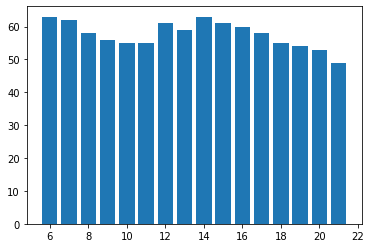

In [70]:
plt.bar(range(6, 22), list(hour_delivery_time_dict.values()))